In [1]:
!pip install kaggle

In [3]:
!pip install scikit-learn==1.4.1.post1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 73.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [4]:
from google.colab import files
upload = files.upload()

Saving kaggle.json to kaggle.json


In [5]:
!mkdir ~/.kaggle

In [6]:
!mv kaggle.json ~/.kaggle/

In [7]:
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets list

ref                                                  title                                     size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------  ---------------------------------------  -----  -------------------  -------------  ---------  ---------------  
syedanwarafridi/vehicle-sales-data                   Vehicle Sales Data                        19MB  2024-02-21 20:16:17           9598        171  1.0              
arnavvvvv/spotify-music                              Top Spotify Songs                         47KB  2024-03-06 05:20:29           1476         31  1.0              
tarunrm09/climate-change-indicators                  Climate change Indicators                 34KB  2024-02-22 08:53:54           4947        109  1.0              
arnavvvvv/netflix-movies-and-tv-shows                Netflix Movies and TV Shows                1MB  2024-03-04 15:49:29           1809         44  1.0              
nbro

In [9]:
!kaggle datasets download -d batjoker/zomato-restaurants-hyderabad

  0% 0.00/1.23M [00:00<?, ?B/s]
100% 1.23M/1.23M [00:00<00:00, 65.6MB/s]


In [10]:
!unzip zomato-restaurants-hyderabad.zip

Archive:  zomato-restaurants-hyderabad.zip
  inflating: Restaurant names and Metadata.csv  
  inflating: Restaurant reviews.csv  


In [50]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
df = pd.read_csv('Restaurant names and Metadata.csv')

In [15]:
df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


<Axes: xlabel='Name'>

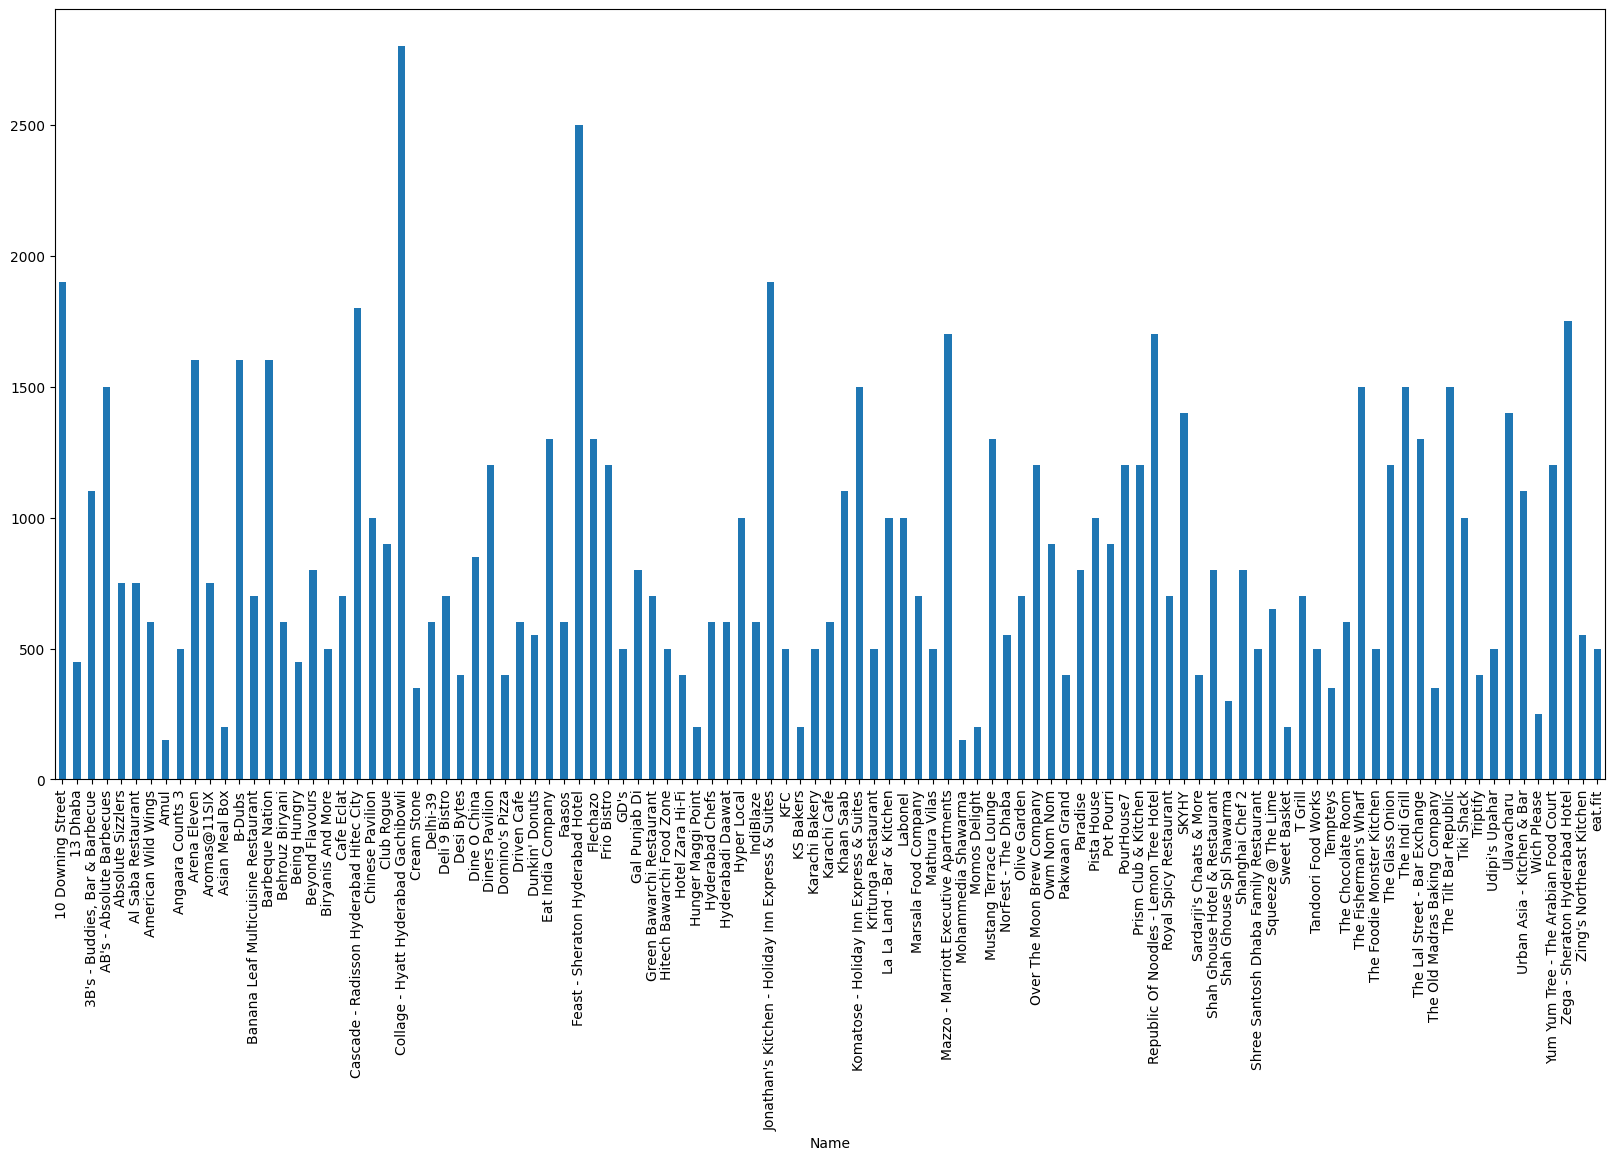

In [52]:
# df['Cost'] = df['Cost'].str.replace(',', '').astype(int)
plt.figure(figsize=(20, 10))
df.groupby('Name')['Cost'].mean().plot(kind='bar')

In [53]:
df1 = pd.read_csv('Restaurant reviews.csv')
df1.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [16]:
vector = TfidfVectorizer()
df['Collections'] = df['Collections'].fillna("")
tfid = vector.fit_transform(df['Collections'])

In [17]:
cosine_matrix = linear_kernel(tfid, tfid)

In [19]:
indices = pd.Series(df['Name'].index, index=df['Name'])

In [21]:
indices

Name
Beyond Flavours                             0
Paradise                                    1
Flechazo                                    2
Shah Ghouse Hotel & Restaurant              3
Over The Moon Brew Company                  4
                                         ... 
IndiBlaze                                 100
Sweet Basket                              101
Angaara Counts 3                          102
Wich Please                               103
Republic Of Noodles - Lemon Tree Hotel    104
Length: 105, dtype: int64

In [22]:
indices['Paradise']

1

In [56]:
def get_recommendations(title, cosine_matrix=cosine_matrix):
  idx = indices[title]
  sim_scores = enumerate(cosine_matrix[idx])
  sorted_scores = sorted(sim_scores, key=lambda x:x[1], reverse=True)
  sorted_scores = sorted_scores[1:10]
  index = [i[0] for i in sorted_scores]
  return df.iloc[index]

Name = get_recommendations('Paradise')

In [57]:
Name

,Name,Links,Cost,Collections,Cuisines,Timings
22,B-Dubs,https://www.zomato.com/hyderabad/b-dubs-gachib...,1600,Hyderabad's Hottest,American,"11am to 11:30pm (Mon, Tue, Wed, Thu, Sun), 11a..."
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
69,The Indi Grill,https://www.zomato.com/hyderabad/the-indi-gril...,1500,"Food Hygiene Rated Restaurants in Hyderabad, G...","BBQ, Asian, Modern Indian",12noon to 11pm (Mon-Sun)
14,AB's - Absolute Barbecues,https://www.zomato.com/hyderabad/abs-absolute-...,1500,"Barbecue & Grill, Great Buffets, Corporate Fav...","European, Mediterranean, North Indian","12 Noon to 4:30 PM, 6:30 PM to 11:30 PM"
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."
5,The Fisherman's Wharf,https://www.zomato.com/hyderabad/the-fisherman...,1500,"Sunday Brunches, Corporate Favorites, Great Bu...","Seafood, Goan, North Indian, Continental, Asian","12Noon to 3:30PM, 4PM to 6:30PM, 7PM to 11:30P..."
55,Cafe Eclat,https://www.zomato.com/hyderabad/cafe-eclat-ga...,700,Sneak Peek Hyderabad,"Cafe, Bakery",8 AM to 11:30 PM
6,eat.fit,https://www.zomato.com/hyderabad/eat-fit-gachi...,500,Food Hygiene Rated Restaurants in Hyderabad,"Healthy Food, North Indian, Continental, South...",7 AM to 10 PM
67,Yum Yum Tree - The Arabian Food Court,https://www.zomato.com/hyderabad/yum-yum-tree-...,1200,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Hyderabadi",12 Noon to 12 Midnight
